# MATH&ML-12. Временные ряды. Часть I

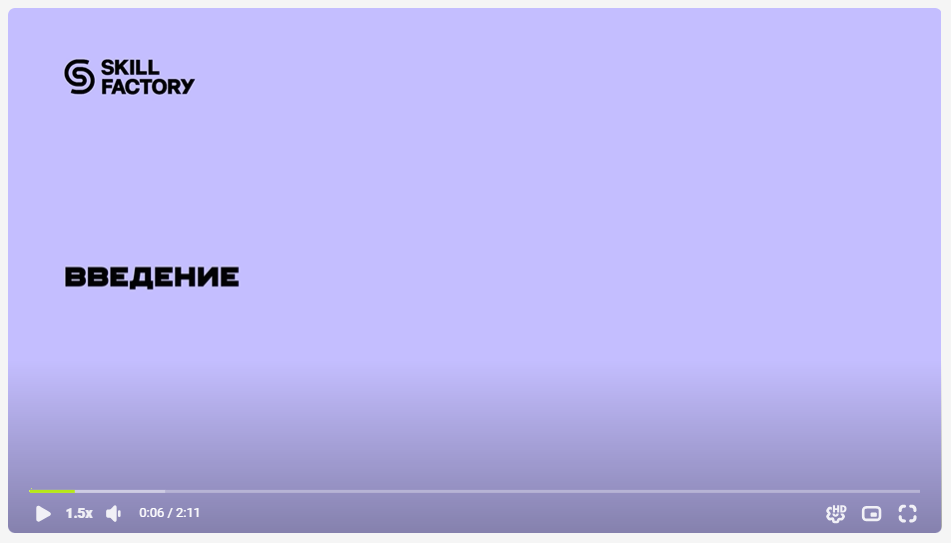

**Временные ряды** — это отдельный класс задач, характеризующийся определённым типом данных и инструментов, подходящих для решения таких задач.

Начнём наше знакомство с темой с небольшого примера.

Представьте, что вы — климатолог и хотите проанализировать скорость и направление ветра в разных точках земного шара.

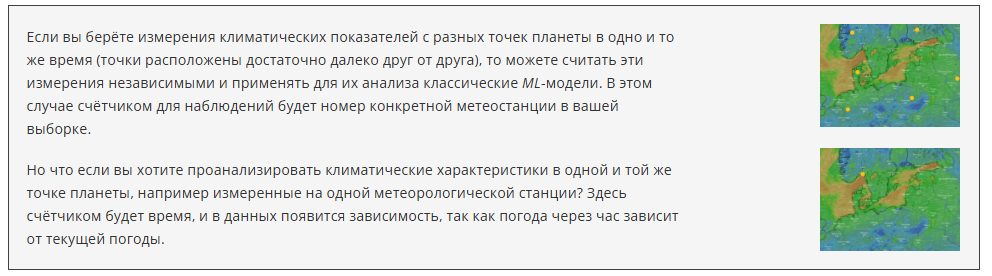

С появлением зависимости наблюдений от времени вся математическая структура данных поменялась — наблюдения одной и той же переменной в разные моменты времени стали зависимыми друг от друга. Мы получили **временной ряд**.

Примеры временных рядов:

- всевозможные экономические индексы (RTS, DJIA и др.);
- стоимость активов на бирже (курсы нефти, ценных бумаг, валют и криптовалют);
- физические показатели спортсмена во время тренировок или специальных нагрузочных тестов;
- средняя дневная скорость интернета;
- регулярные измерения роста, веса, давления;
- температура воды в Красном море по дням в июле.

Умение работать с временными рядами является отличным навыком, который откроет перед вами множество дверей: финансовая отрасль, маркетинг и продажи, анализ производственных показателей и другие сферы.

В этом модуле вы узнаете:

- что такое шум во временном ряду;

- как определять тренд и выделять сезонность;

- как сглаживать ряды экспоненциально;

- какой ряд можно считать стационарным и на что это влияет;

- как определять корреляцию, автокорреляцию и читать коррелограмму.

Кроме того, в итоговой практике вы проведёте полное аналитическое исследование временного ряда.

Прежде чем углубляться в ещё не знакомые термины, давайте узнаем, какими особенностями обладают временные ряды →

# 2. Временной ряд и его основные свойства

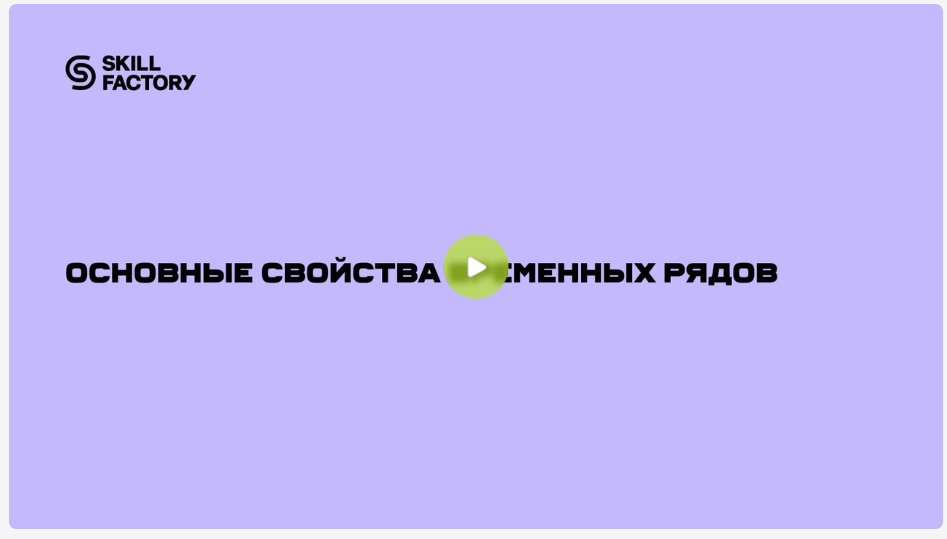

Как вы, вероятно, уже догадались, **временной ряд** — это измерения одной и той же случайной величины в разные моменты времени.

В бизнесе временные ряды ценятся за возможность прогнозировать значение целевой переменной на будущее. Самые очевидные примеры использования временных рядов в бизнесе — финансовое моделирование и прогнозирование спроса или выручки.

Ниже приведено ещё несколько примеров применения временных рядов в бизнесе.

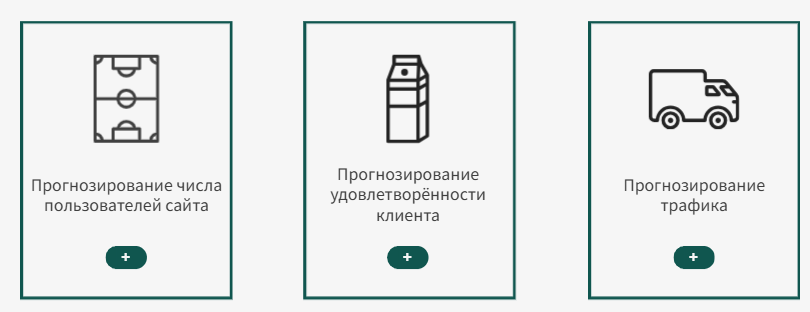

Теперь выделим несколько формальных свойств временного ряда:

1. Данные временного ряда **структурированы**, а атрибуты (так иногда называют признаки) зависимы от времени.
На графике ниже визуализирован временной ряд фактического дохода компании. Данные структурированы (упорядочены и находятся в таблице), а фактический доход — это атрибут, зависящий от времени.

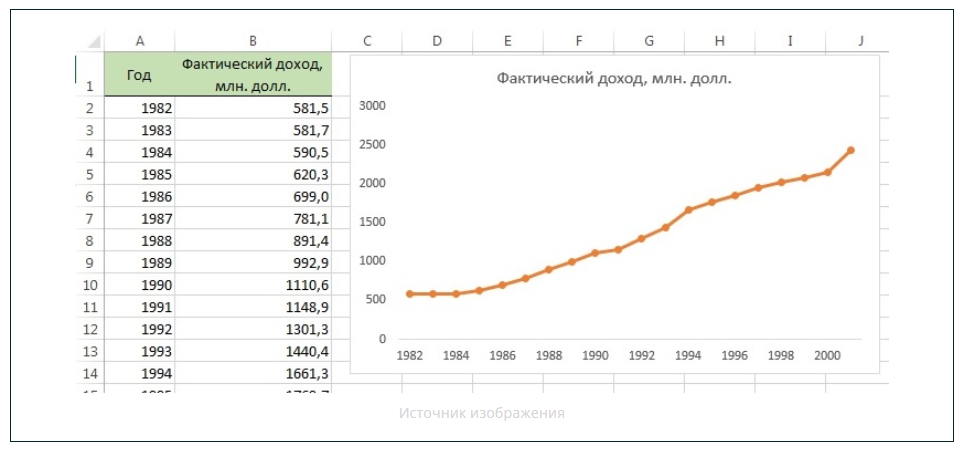

2. Данные временного ряда, в отличие от любых других данных, имеют **определённую последовательность**. На графиках ниже отображены продажи мороженого с января по декабрь.

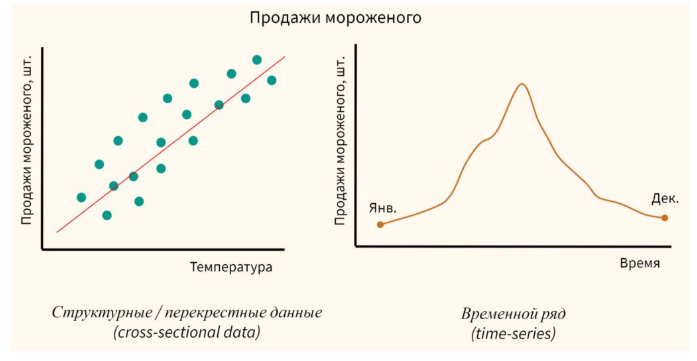

3. В отличие от анализа других данных, в анализе временных рядов важно, чтобы последовательные значения в данных наблюдались через равные промежутки времени, например каждый час, неделю, год, каждый понедельник и так далее. На графике ниже визуализирован временной ряд с получением данных за равные промежутки времени (дни).

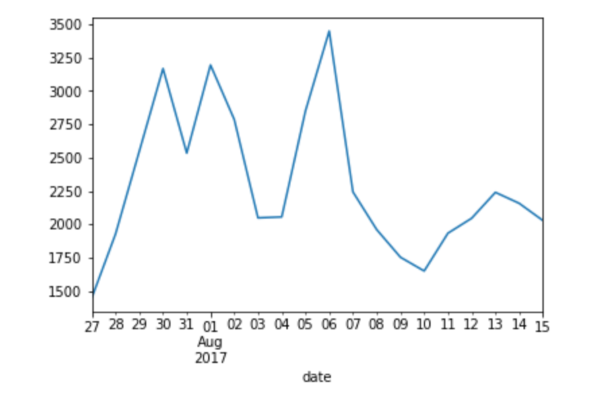

Итак, теперь мы знаем, что отличительной особенностью временного ряда является наличие временного измерения или номер измерения по порядку, а также что при анализе данных временного ряда учитывается зависимость атрибутов от времени.

В следующем юните мы познакомимся с неотъемлемыми составляющими временного ряда — **трендом, сезонностью и шумом**. А пока давайте закрепим полученные знания с помощью небольшого теста ↓

# 3. Тренд, сезонность, шум. Инструменты для декомпозиции временного ряда

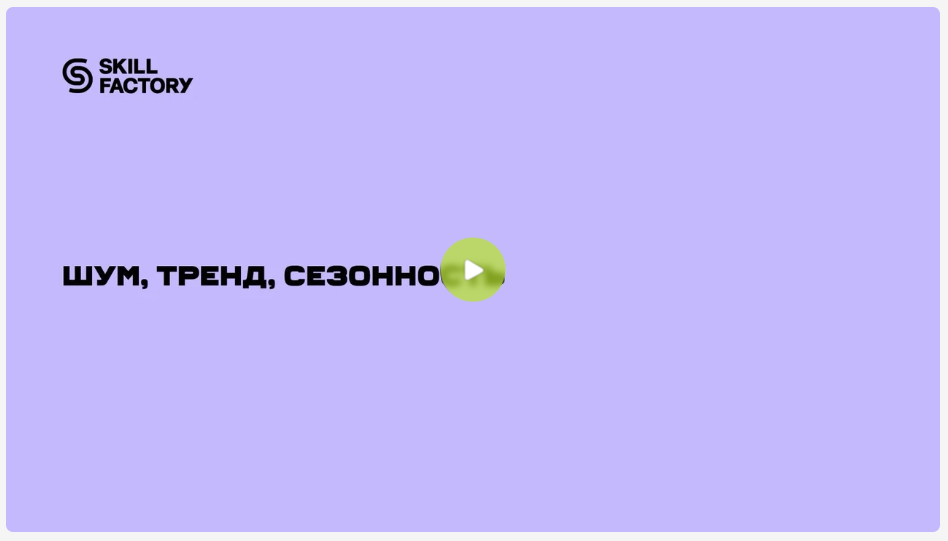

Анализ временных рядов следует стандартному плану:

1. Выявление тренда

**Тренд** — это основная тенденция изменения величины со временем.

Если повезёт, тренд будет линейным и предсказать его будет проще.

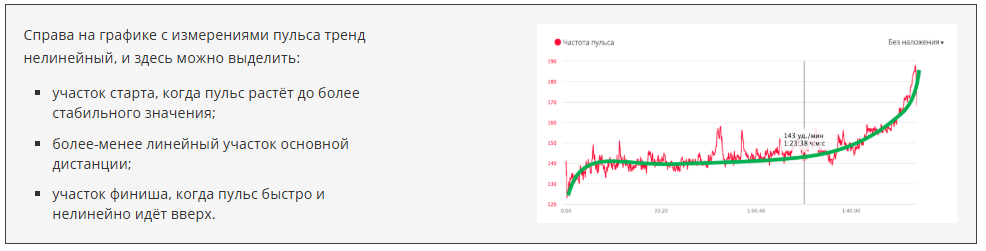

**Большое преимущество тренда** — его можно прогнозировать как функцию времени, не учитывая предыдущие значения временного ряда.

2. Анализ сезонности и цикличности

**Сезонность** задаёт периодические колебания ряда вокруг тренда. Сезонность есть не всегда, но очень часто.

Например, продажи автомобилей каждый год немного растут в декабре и падают в январе следующего года.

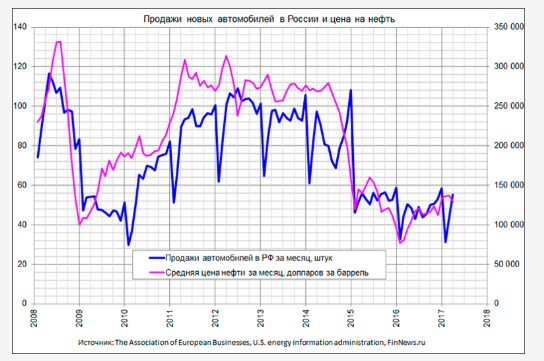

Затем необходимо оценить цикличность.

**Цикличность** — это колебания временного ряда относительно тренда.

Отличием цикличности от сезонности является то, что сезонность возникает из периода в период (каждый декабрь, каждые выходные и т. д.), а цикличность проявляется на более длительных дистанциях и может слегка меняться от цикла к циклу.

На графике ниже показан цикл изменения объёма валового национального продукта в зависимости от времени. Такая цикличность скорее зависит не от сезона/квартала, а от внешних факторов.

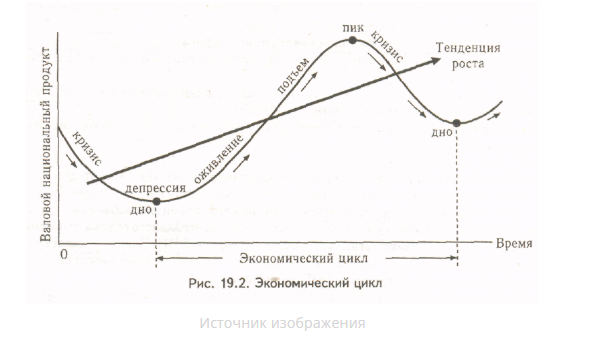

3. Проверка на шум

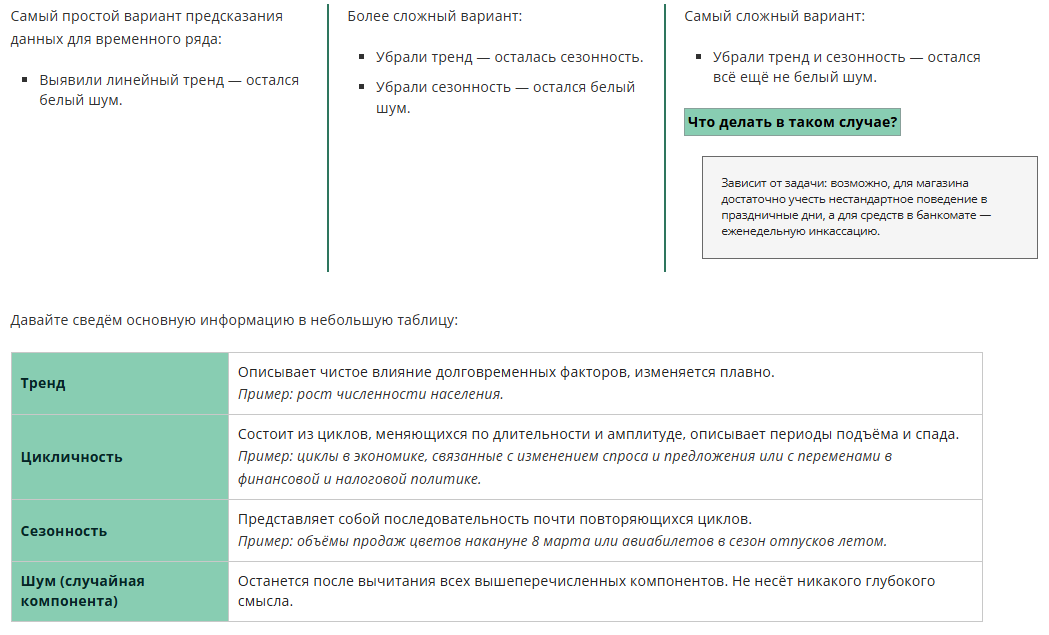

### Инструменты для декомпозиции временного ряда

Разделить ряд на компоненты в Python можно с помощью библиотеки statsmodels. Если вы не устанавливали её ранее, это можно сделать стандартным способом (pip install statsmodels) или следуя рекомендациям в официальной документации.

В этом датасете представлены данные о количестве авиапассажиров в 1949-1960 годах. Рассмотрим некоторый временной ряд df из данного датасета.

In [ ]:
#pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\tgorbunov\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


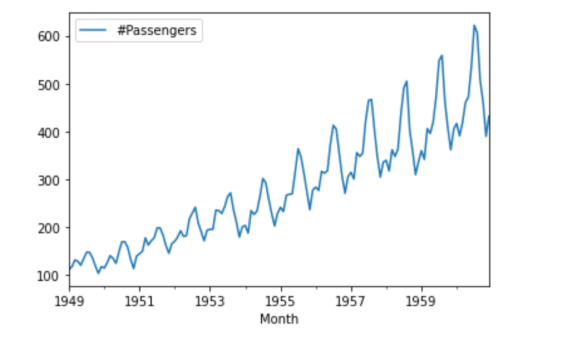

Теперь рассмотрим код, в котором демонстрируется, как применять декомпозицию к временному ряду df.

Декомпозиция выполняется методом seasonal_decompose(), который принимает на вход временной ряд с одним признаком. Индексом ряда должна быть дата или время. Именно поэтому, считывая датасет, мы указываем индексом столбец month и приводим его к формату даты. Также, если вы знаете, что в вашем временном ряду присутствует период, его вы также можете передать в качестве параметра в seasonal_decompose(). Более подробно о необязательных параметрах можно узнать в документации.

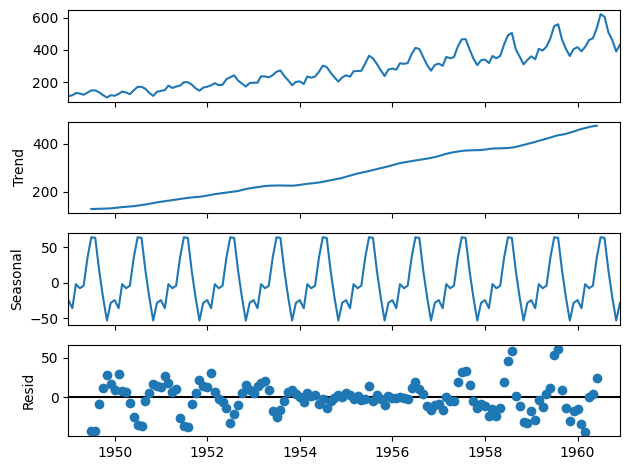

In [5]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

В результате выполнения кода мы увидим примерно следующий результат:

Как можно увидеть, по исходному ряду был получен тренд, выявлена некоторая сезонность и шум.

Отрабатывать навыки определения тренда, сезонности и шума и делать дальнейший анализ мы будем в итоговой практике, а пока давайте выполним несколько заданий и двинемся дальше ↓

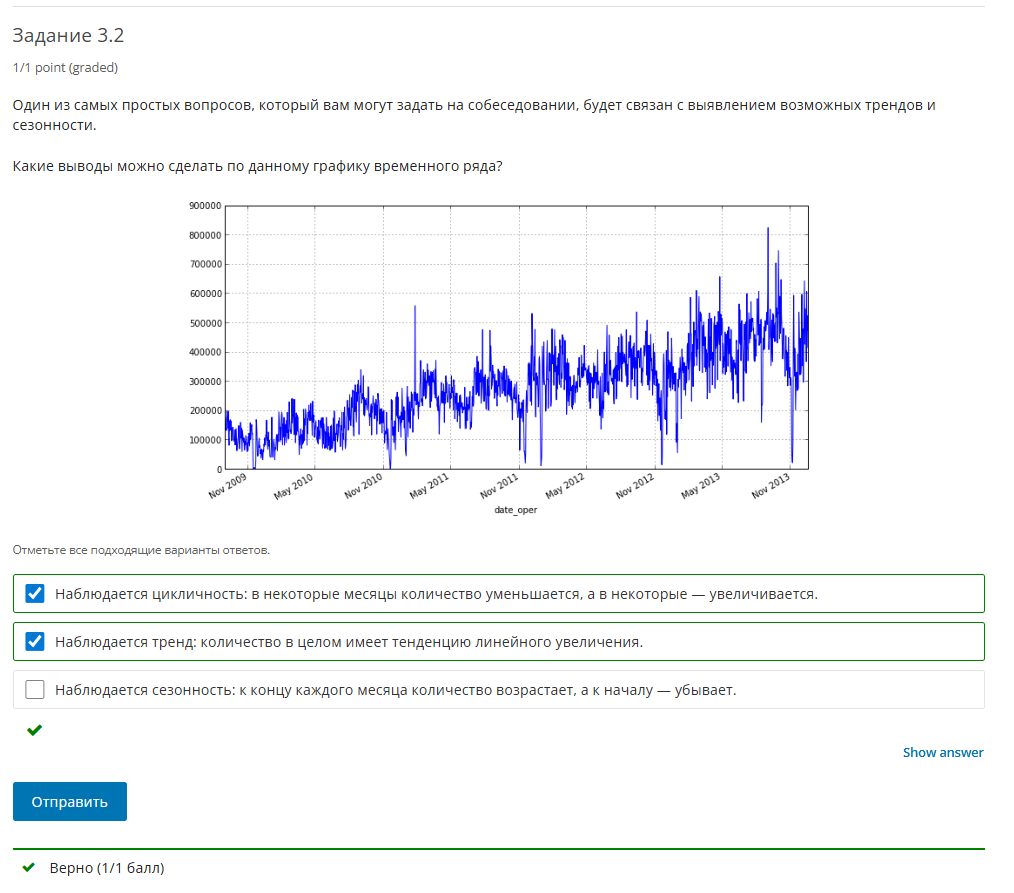

# 4. Экспоненциальное сглаживание

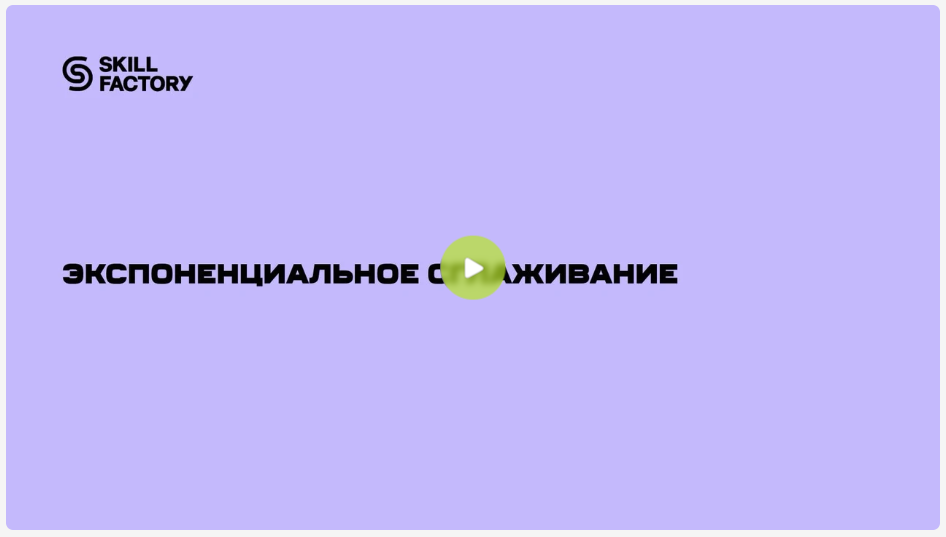

Одним из интересных способов анализа временного ряда является экспоненциальное сглаживание. Давайте разберёмся, что это такое и чем оно отличается от других методов прогнозирования.

**Экспоненциальное сглаживание** — это метод прогнозирования временных рядов для одномерных данных с трендом или сезонным компонентом. Оно также известно как метод простого экспоненциального сглаживания, или метод Брауна.

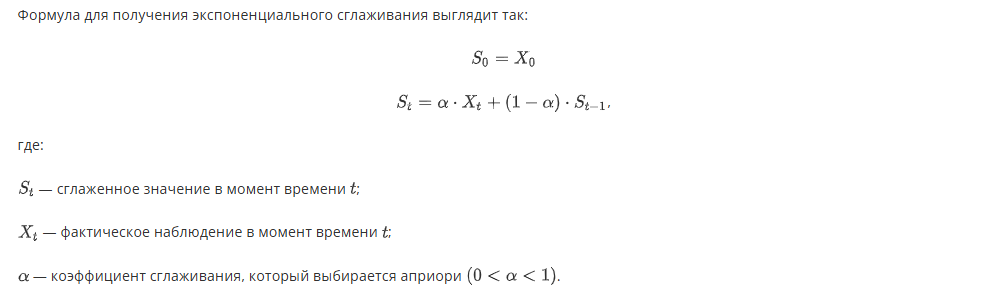

Обратите внимание, что формулу необязательно заучивать: главное — чтобы вы понимали принцип работы алгоритма.

В случае с этой формулой каждый новый элемент временного ряда рассчитывается от предыдущего и от сглаженного исходного.

Рассмотрим пример.

Нам известны значения температуры за прошедший месяц, и мы хотим предсказать погоду на следующий день. Мы можем предположить, что в этом случае погода завтра в большей степени будет зависеть от погоды вчера и сегодня, чем от погоды 30 дней назад. Если мы хотим учитывать удалённость значений от текущего момента, то экспоненциальное сглаживание пригодится тут как нельзя кстати.

Проще говоря, под **экспоненциальным сглаживанием** понимается взвешенная линейная сумма наблюдений, при этом веса для наблюдений экспоненциально уменьшаются для более старых наблюдений. Тем самым мы не обращаем особого внимания на поведение в прошлом, а недавнему поведению присваиваем больший вес. Если быть точнее, наблюдения взвешиваются с геометрически уменьшающимся коэффициентом.

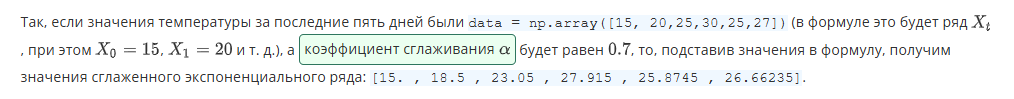

In [7]:
import numpy as np

def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235]


Так как по формуле значение для следующего дня рассчитывается от значения для текущего, мы можем продолжить получать следующие значения для экспоненциально сглаженного ряда, таким образом совершая прогноз (день за днём). В нашем примере для шестого дня мы получили прогнозируемое значение температуры в 26.6 градусов (26.66235, если быть точнее):



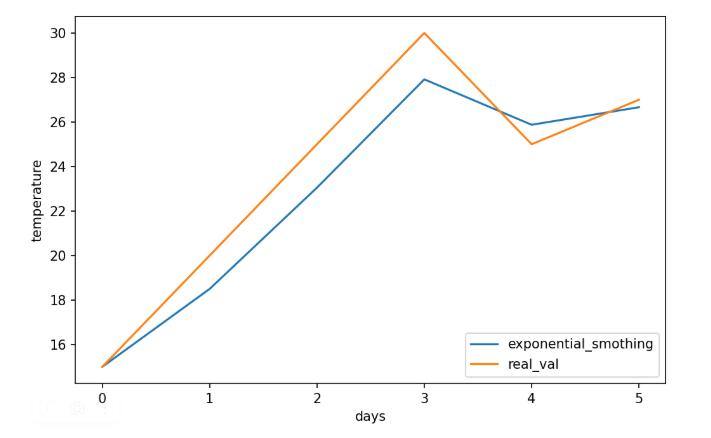

Коэффициент экспоненциального сглаживания подбирается интуитивно. Чем выше коэффициент, тем меньше внимания мы обращаем на старые данные. Если коэффициент близок к 0, данным в далёком прошлом будет уделено больше внимания. Так, при коэффициенте, равном 0.1, значения экспоненциально сглаженного ряда будут выглядеть так (сравните с предыдущим графиком):

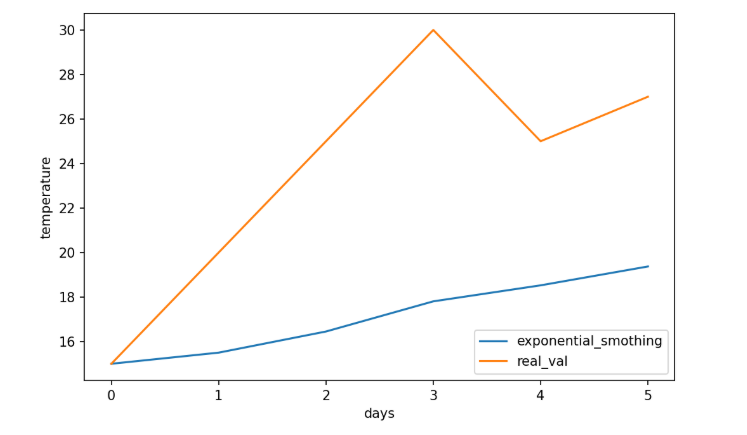

В примере выше сглаженный ряд мы рассчитывали «вручную» по формуле, но делать это каждый раз нет необходимости, так как эта возможность уже встроена в библиотеку statsmodels. Для совершения предсказания методом простого экспоненциального сглаживания воспользуемся методом SimpleExpSmoothing из statsmodels.tsa.api.

Попробуйте запустить код ниже:

In [8]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


Простое экспоненциальное сглаживание используется в задачах сглаживания и краткосрочного прогнозирования временных рядов.

В следующем юните мы познакомимся с ещё одной важной характеристикой временного ряда, а пока предлагаем вам ознакомиться с дополнительной литературой по изученной теме и выполнить несколько заданий.

Дополнительно

- Статья про типы экспоненциального сглаживания https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
- Лекция 9. Экспоненциальное сглаживание. Распознавание образов: метод -го ближайшего соседа (первая половина лекции) https://www.youtube.com/watch?v=M0Hz1u59Ysw

# 5. Стационарность

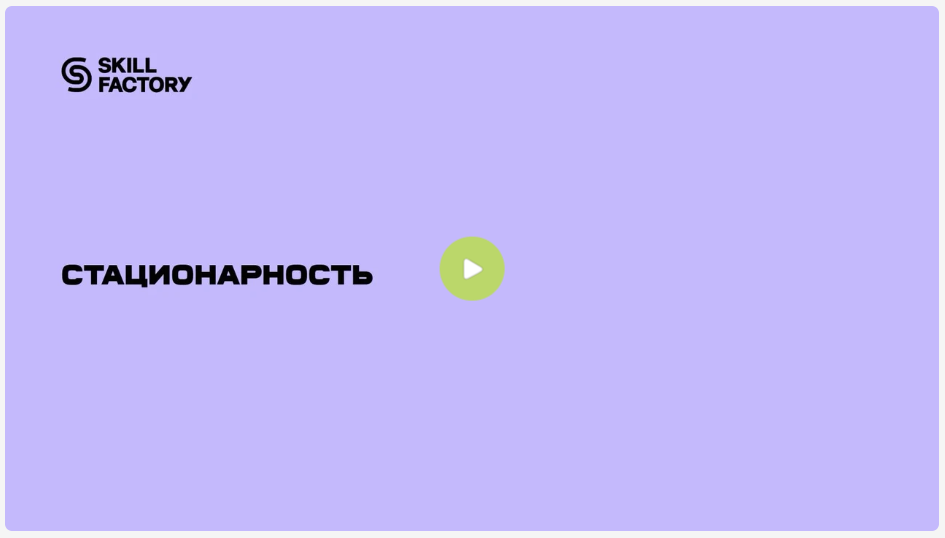

Прежде чем погрузиться в формальные определения стационарности и связанные с ней концепции, разберёмся, почему они важны.

Стационарность означает, что сам временной ряд может меняться с течением времени, однако статистические свойства генерирующего его процесса не меняются.

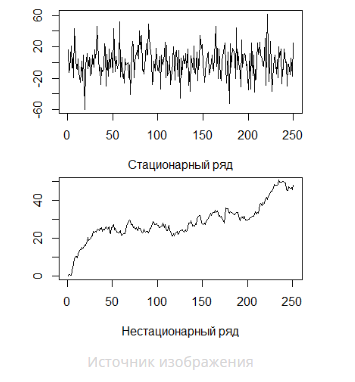

Почему это важно? Потому что стационарные процессы легче анализировать, а ещё их можно предсказывать, поскольку предсказуем способ их изменения.

Говоря простым языком, стационарный процесс (стационарный временной ряд) — это процесс, который не меняет свои основные характеристики со временем (обратите внимание на графики стационарного и нестационарного временного ряда выше). Это значит, что при сдвиге во времени не меняются математическое ожидание, дисперсия и совместное распределение вероятности.

Примером стационарного процесса является маятник без трения, который колеблется назад и вперёд. Из-за отсутствия трения его амплитуда и частота остаются неизменными.

- В нашем же случае временной ряд будет стационарным, если у него отсутствуют тренд и сезонность, а математическое ожидание и дисперсия при этом остаются постоянными на протяжении всего периода времени.
- У нестационарного временного ряда статистики (математическое ожидание и дисперсия) будут изменяться со временем, а сам ряд будет иметь сезонность и/или тренд.

Так как нестационарный ряд анализировать труднее, в анализе временных рядов принято приводить любой временной ряд к стационарности. Это можно сделать путём выявления и устранения тренда и сезонности.

Существует несколько методов проверки временного ряда на стационарность:

1. Визуально оценить по графику данных, есть ли какие-либо очевидные тенденции или сезонность. Например, на графике ниже нет ни выраженного тренда, ни сезонности.

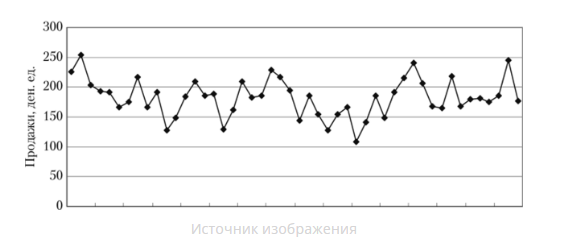

2. Просмотреть сводную статистику для данных по сезонам, чтобы понять, есть ли очевидные и существенные различия.
3. Использовать статистические тесты, чтобы проверить, выполняются ли ожидания стационарности. О статистических тестах пойдёт речь ниже.

### Статистические тесты на Python

Одним из наиболее распространённых тестов на проверку временного ряда на стационарность является **расширенный тест Дики — Фуллера**. В тесте формулируется две гипотезы:

- нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
- альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.

В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 5 %, 10 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

- Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
- Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

Рассмотрим пример проведения теста Дики — Фуллера на данных временного ряда Daily Total Female Births. В данных содержится количественная информация о девочках, рождённых за несколько месяцев. Для проведения теста будем использовать функцию adfuller() из пакета statsmodels.

In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"data/daily-total-female-births.csv", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


### Что делать, если ряд нестационарный?

Если тест на стационарность показал, что ряд нестационарный и в нём присутствуют тренд и сезонность, необходимо избавиться от них.

Обычно для этого достаточно взять разность рядов. Разность выполняется путём дифференцирования ряда, для этого вычисляется разность между двумя соседними наблюдениями ряда. Если полученная первая разность ряда окажется стационарной, то этот ряд называется **интегрированным рядом первого порядка**.

Для определения **порядка интегрированного ряда** необходимо сделать следующее:

1. Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):

In [10]:
df_diff_1 = df.diff().dropna()

2. Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):


In [11]:
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.625178633871343
p-value:  1.5472400091969784e-23
Critical values:  {'1%': np.float64(-3.44880082033912), '5%': np.float64(-2.869670179576637), '10%': np.float64(-2.5711012838861036)}
ряд стационарен


Если полученный ряд нестационарен, можно провести эту процедуру ещё раз, то есть ещё раз дифференцировать разность ряда, полученную на предыдущем этапе.

Если после двукратного дифференцирования результат окажется стационарным временным рядом, то исходный временной ряд будет называться интегрированным рядом второго порядка, и так далее.

Запомните этот момент: в юните об авторегрессии нам пригодится порядок разности, приводящий ряд к стационарности.

#  6. Автокорреляция

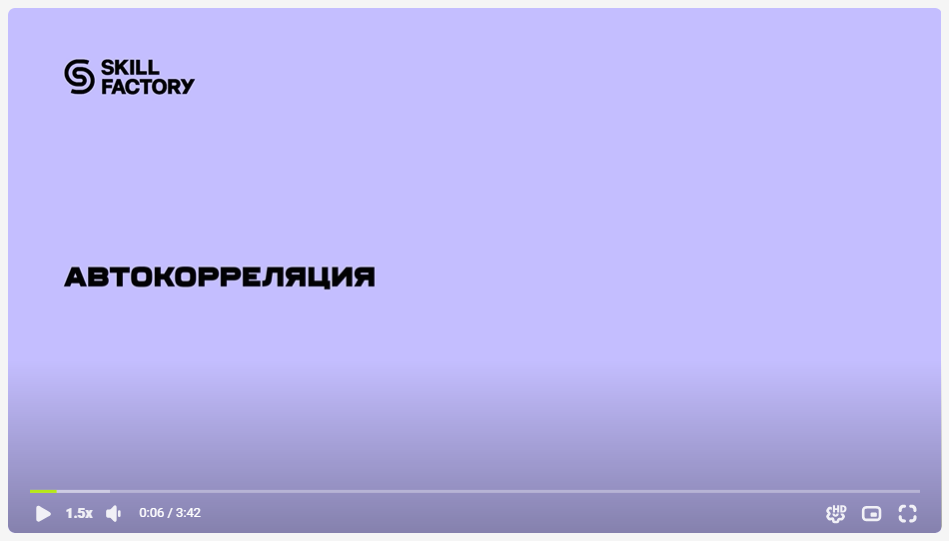

Раньше вы уже встречались с понятием «корреляция».

**Корреляция** — это статистическая взаимосвязь, присутствующая между двумя и более величинами, то есть некоторая линейная зависимость (например, между признаками).

Что же такое автокорреляция временного ряда?

**Автокорреляция** — это статистическая взаимосвязь между последовательностями значений одного временного ряда, взятыми со сдвигом. Другими словами, автокорреляция говорит нам о том, насколько значение во временном ряду похоже на предыдущее значение.

Таким образом, автокорреляция — это корреляция ряда с самим собой (отсюда приставка «авто»), но со сдвигом во времени. Она помогает выявлять тенденции в данных и оценивать влияние ранее наблюдаемых значений на текущее наблюдение.

У автокорреляции много применений, но в первую очередь её используют для обработки сигналов, прогнозирования погоды и анализа рынка ценных бумаг. Иногда автокорреляция позволяет обнаружить скрытые тенденции.

Научиться находить автокорреляцию в Python довольно просто — далее мы разберём, когда и как можно применять эту функцию, а когда она может оказаться неэффективной. Но сначала рассмотрим несколько определений — чтобы построить график автокорреляции на Python, необязательно знать эти термины, однако их понимание позволит вам значительно лучше интерпретировать результаты.

- **Лаг** — это предыдущее наблюдение (например, лаг в шесть дней относительно сегодняшнего дня указывает на значение чего-либо, полученное шесть дней назад).
- **Положительная корреляция** — это отношение, при котором увеличение одного значения предсказывает увеличение другого.
- **Отрицательная корреляция** — это отношение, при котором увеличение одного значения предсказывает уменьшение другого.
- **Доверительный интервал** — это рассчитанный диапазон значений, в котором, вероятно, будет содержаться неизвестное (предсказанное) значение для наших данных.
- **Уровень достоверности** — это вероятность того, что доверительный интервал будет содержать наблюдаемое значение (фактическое значение для предсказания).

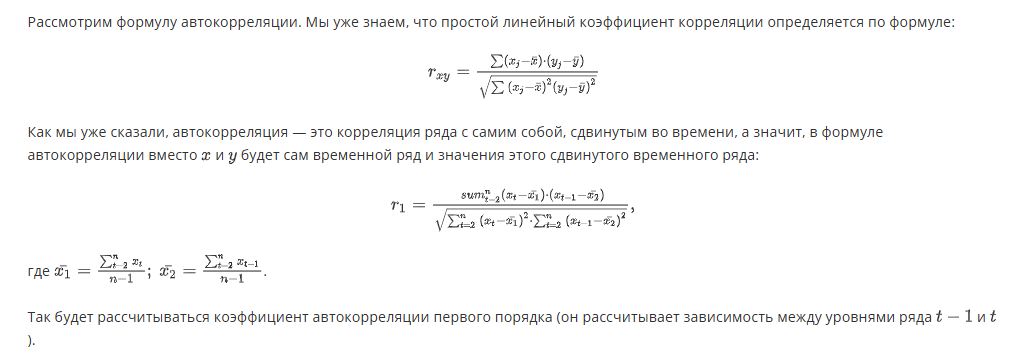

График автокорреляций разного порядка называется коррелограмма. Его довольно просто построить с помощью метода plot_acf из пакета statsmodels.graphics.tsaplots. Методу необходимо передать всё тот же временной ряд с индексом-датой.

Воспользуемся датасетом из примера сезонной декомпозиции, в котором представлены данные о количестве авиапассажиров в 1949–1960 годах.

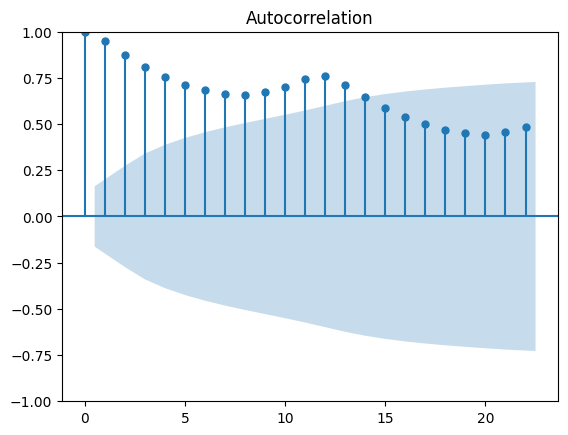

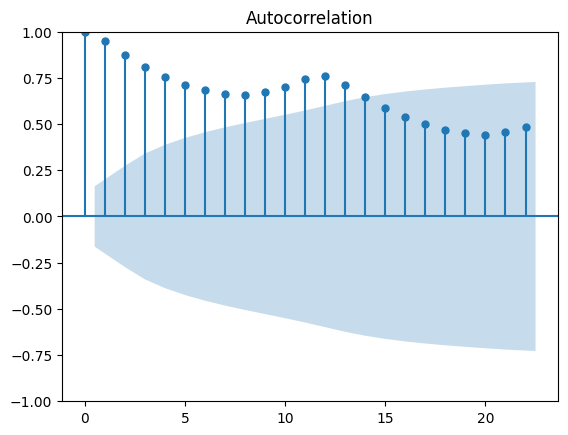

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df)

На оси х коррелограммы расположен лаг (порядок), при котором вычисляется автокорреляция. Ось y показывает значение корреляции (от -1 до 1). Чем ближе значение корреляции к 1 или -1, тем выше зависимость, например:

- пик при лаге, равном 1, показывает сильную зависимость между значениям ряда и предыдущим значением;
- пик при лаге, равном 2, показывает сильную корреляцию между каждым значением и значением в более ранний момент на расстоянии 2 от данного.

Также можно встретить коррелограммы, похожие на гистограммы, но их смысл от этого не меняется.

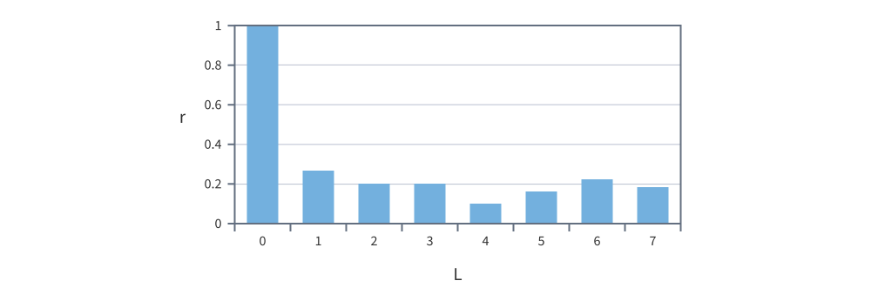

Для совершения предсказаний по данным временного ряда статистическими моделями, необходимо, чтобы во временном ряду присутствовала зависимость, а коррелограмма — хороший способ визуально определить наличие такой зависимости. Значения на коррелограмме будут близки к 0 в случае, если данные ряда не зависят от себя в прошлом. Если скрытая зависимость всё-таки имеется, то одно или несколько значений будут значительно отличаться.

### Как читать коррелограмму?

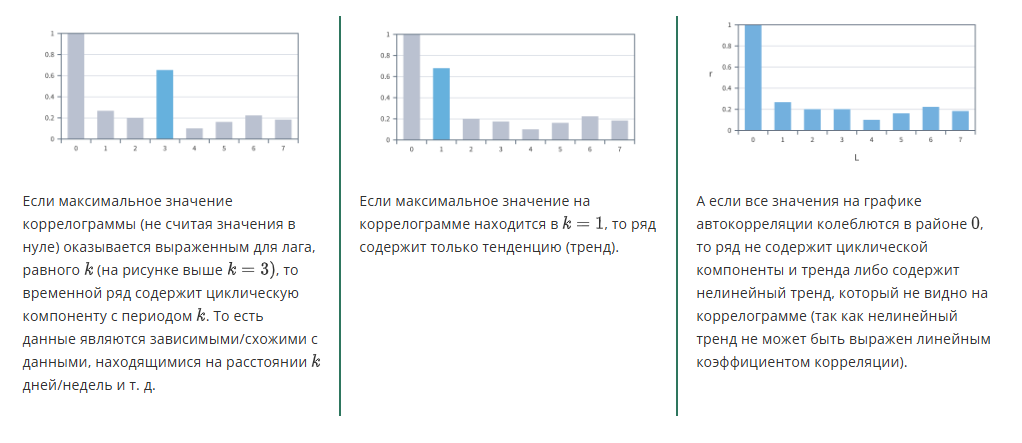

### Частичная автокорреляция

Для определения сезонного периода используется частичная автокорреляция. Она похожа на классическую автокорреляцию, однако дополнительно избавляется от линейной зависимости между сдвинутыми рядами. График частичной автокорреляции читается так же, как и коррелограмма.

Частичная автокорреляция строится с помощью метода plot_pacf из пакета statsmodels.graphics.tsaplots.

Если вы хотите узнать больше про частичную автокорреляцию, рекомендуем обратиться к этой статье. https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/?__cf_chl_tk=Hf5sX1kEDNj.gepnQq2pPs4icSy2FPJUpr0RRZVtKOs-1662130047-0-gaNycGzNCZE

### Автокорреляция остатков

Помимо анализа временного ряда на наличие или отсутствие взаимозависимости, иногда смотрят автокорреляцию остатков модели. В хорошей модели остатки (ошибки) должны иметь случайный характер — это означает, что модель уловила все существующие зависимости.

Рассмотрим, как определять автокорреляцию остатков по графикам остатков (ошибок предсказания):

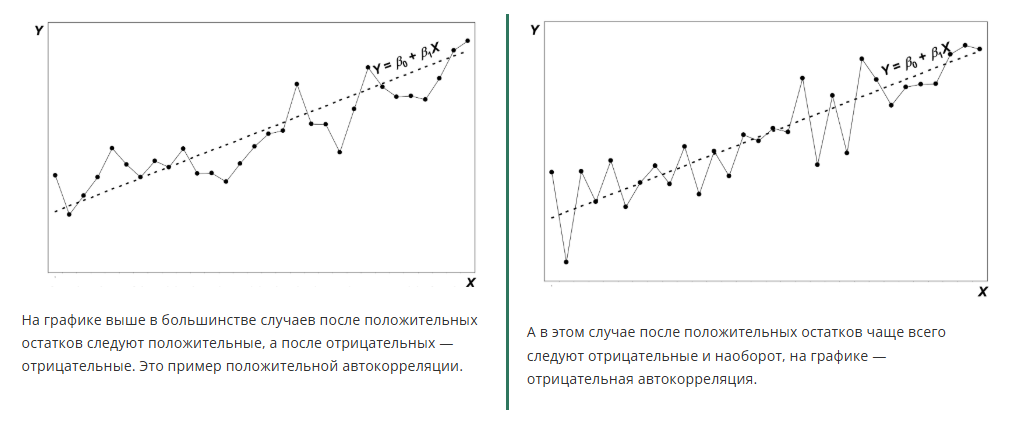

Причины автокорреляции остатков:

- Если в остатках имеется автокорреляция (наличие зависимости), это значит, что какая-то зависимость осталась незамеченной для вашей модели — возможно, какие-то важные признаки не были учтены.
- На появление автокорреляции в остатках может повлиять предварительное сглаживание данных, так как вы искусственно сглаживаете значения (накладывая соседние друг на друга, добавляя зависимость).

Остатки будут случайными, если автокорреляции нет. Статистически, а не только визуально проверить её наличие или отсутствие можно с помощью теста Дарбина — Уотсона. Пример применения теста на автокорреляцию остатков приведён в статье. https://www.statology.org/durbin-watson-test-python/

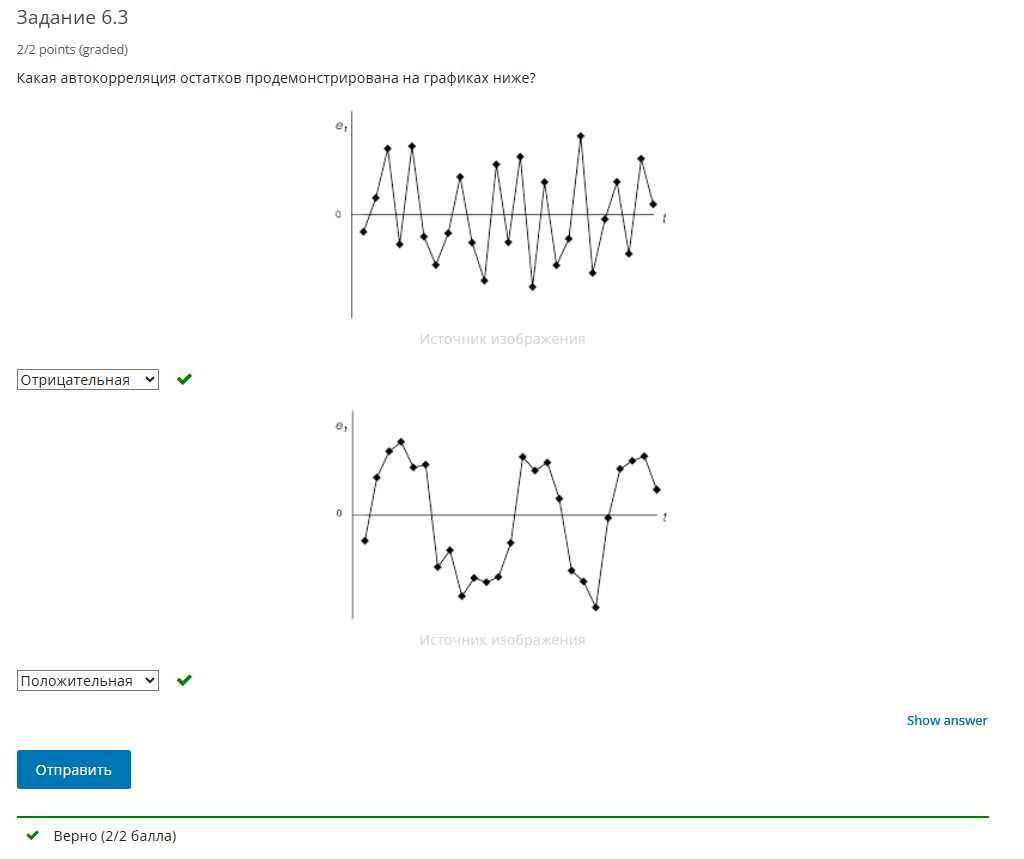

Если в остатках присутствует автокорреляция, скорее всего, предсказания будут далеки от реальных значений и лучше доработать модель, исправив перечисленные выше недочёты.

В следующем юните вы узнаете, как автокорреляция используется для предсказания →

Если вы хотите глубже изучить теорию по автокорреляции, предлагаем вам разобрать эту статью. https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

# 7. Авторегрессия

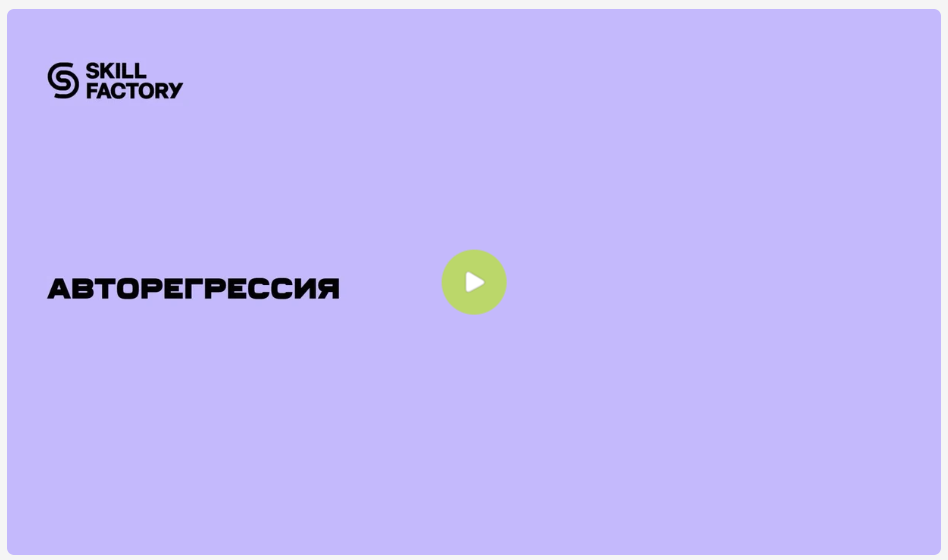

Модель авторегрессии использует методы регрессии и полагается на уже известную нам автокорреляцию.

**Авторегрессионная модель** — это модель временных рядов, которая описывает, как прошлые значения временного ряда влияют на его текущее значение. Как можно понять из значений частей слова, авторегрессия представляет собой линейную регрессию на себя.

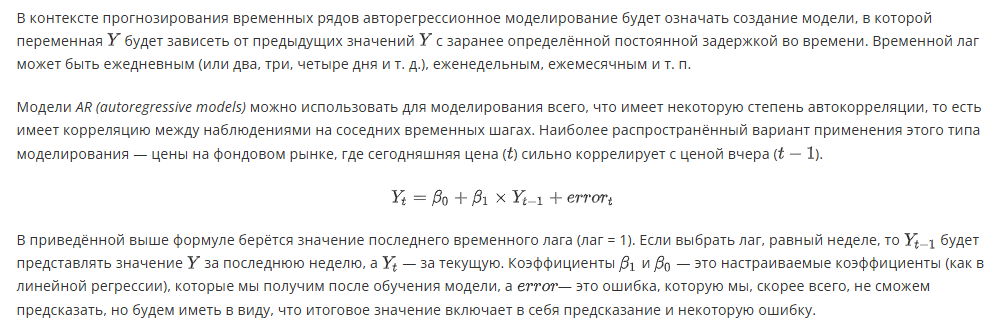

Модель, в которой для расчёта следующего значения используется только предыдущее, называется **моделью первого порядка**, или AR(1).

Давайте разберёмся с концепцией модели AR на примере следующего графика:

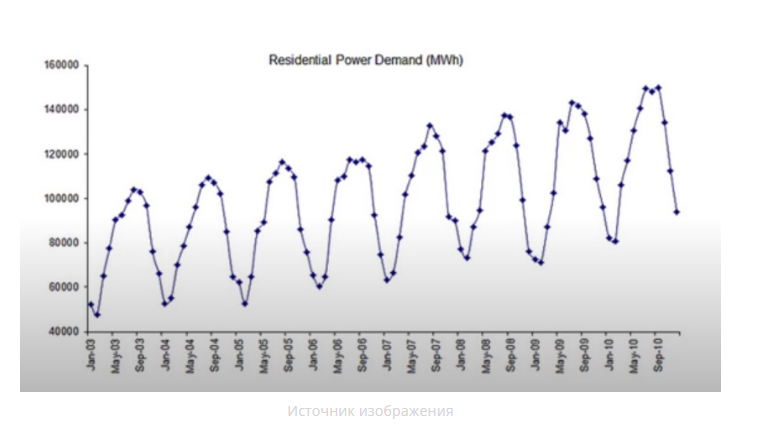

Здесь представлена динамика потребления электроэнергии в жилых домах в разные месяцы с 2003 по 2010 год.

Задача — спрогнозировать потребление на ближайшие месяцы, используя имеющиеся данные.

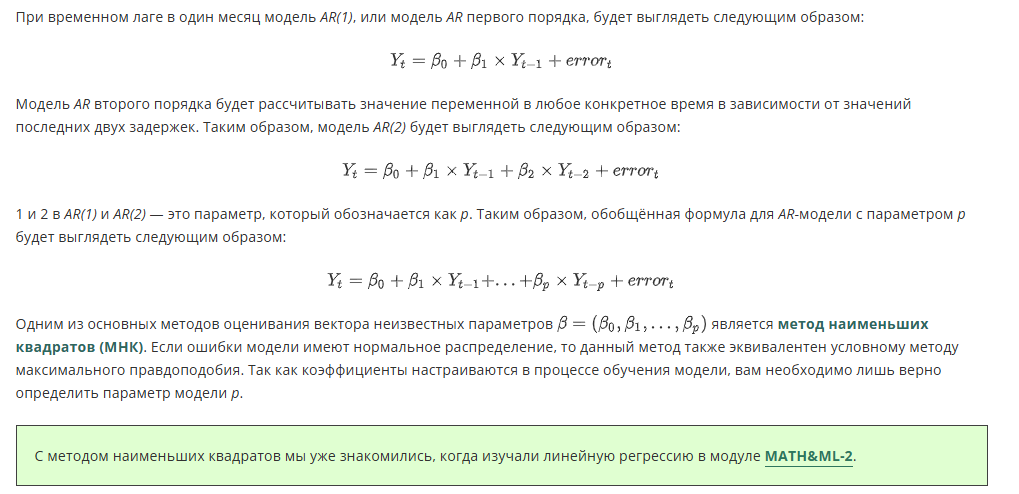

### Как выбирать p?

В предыдущем юните мы познакомились с автокорреляцией и частичной автокорреляцией. Для определения значения p будем использовать график частичной автокорреляции — будем обращать внимание на последний лаг, сильно отличный от нуля, при условии, что ряд стационарный.

Давайте научимся определять p. Перед нами график частичной автокорреляции (pacf). Нам необходимо найти последний лаг, отличный от нуля. В данном случае такими лагами являются лаги 1, 2, 3, 4. Остальные лаги колеблются в районе нуля. Поэтому на этом графике выберем p=4.

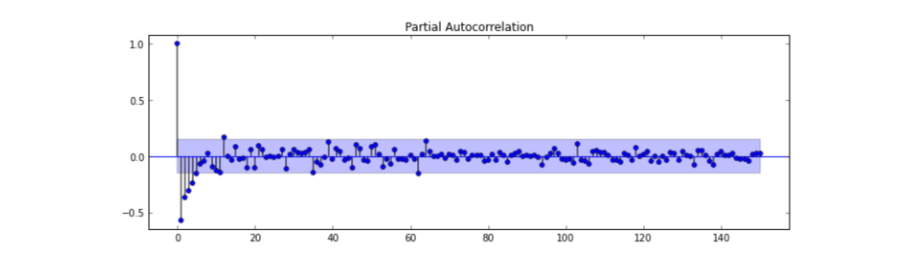

А теперь немного потренируемся ↓

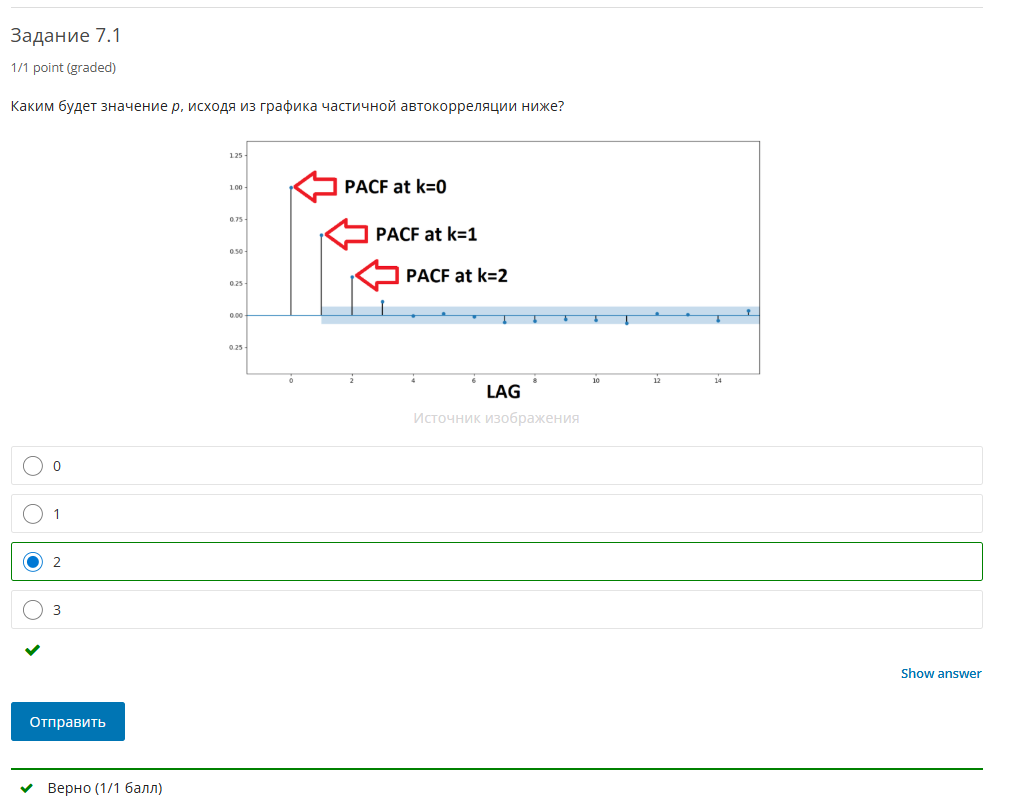

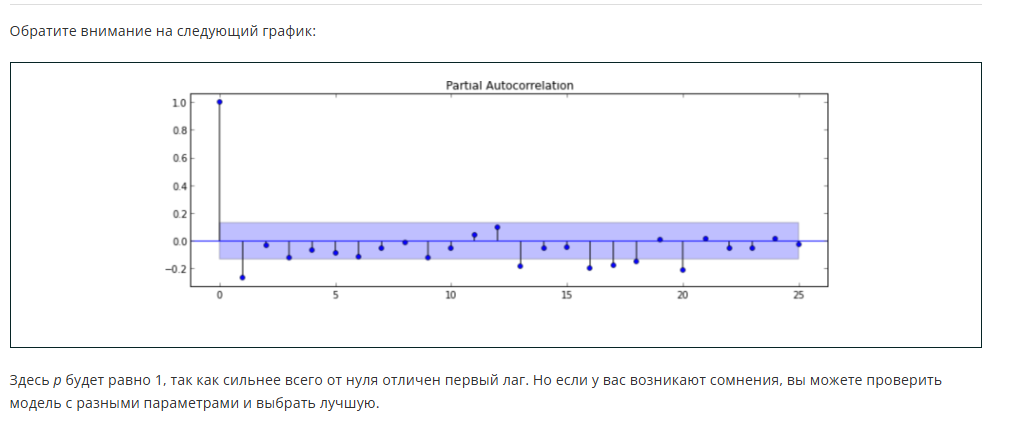

### AR-моделирование на Python

Для загрузки класса ar_model.AutoReg (https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AutoReg.html), который применяется для обучения одномерной авторегрессионной модели порядка p, используется пакет statsmodels.tsa.

Ниже приведены некоторые из ключевых шагов, которые необходимо выполнить для обучения AR-модели:

1. Отобразить временной ряд.
2. Проверить ряд на стационарность (модель AR можно применять только к стационарному временному ряду).
3. Выбрать параметр p (порядок модели AR).
4. Обучить модель.

Все эти шаги вы будете выполнять в итоговой практике, а пока давайте перейдём к самому инструменту моделирования.

Применим авторегрессионную модель к датасету по производству возобновляемой энергии в Германии. Набор данных включает общую информацию о потреблении электроэнергии в стране, а также о производстве ветровой и солнечной энергии за 2006–2017 годы.

Применим авторегрессионную модель к датасету по производству возобновляемой энергии в Германии. Набор данных включает общую информацию о потреблении электроэнергии в стране, а также о производстве ветровой и солнечной энергии за 2006–2017 годы.

Признаки в данных:

- Date — дата (в формате гггг-мм-дд);
- Consumption — потребление электроэнергии (ГВтч);
- Wind — производство ветровой энергии (ГВтч);
- Solar — производство солнечной энергии (ГВтч);
- Wind+Solar — сумма производства ветровой и солнечной энергии (ГВтч).

В качестве примера построим предсказание объёма потребления электроэнергии на три месяца (возьмём последние 100 дней).

Импортируем необходимые библиотеки и загрузим датасет с данными.

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

Проведём тест на стационарность.

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Consumption'].values)

if result[0] > result[4]['5%']: 
    print ('Ряд нестационарен')
else:
    print ('Ряд стационарен')

Ряд стационарен


При использовании статистических моделей временные ряды нельзя делить на обучающую и тестовую выборки случайным образом. Так как нам важно сохранять последовательность, разделим данные на обучающую и тестовую выборки упорядоченно, то есть возьмём в качестве тестовой выборки последние 100 значений. Остальные данные будем использовать для обучения.

In [15]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

Инициализируем и обучим модель. Возьмём lags=8 (AR(8)) — на практике же будем определять это значение по графику частичной автокорреляции:

In [16]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Thu, 22 Jan 2026   AIC                          48483.625
Time:                        17:00:01   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Сделаем предсказание. Метод predict требует два обязательных параметра — метки начала и окончания предсказания. Метка начала предсказания будет равна количеству данных в обучающей выборке, так как нас интересует прогноз со следующего дня. Метка окончания в нашем случае будет равна len(train_data)+100, что эквивалентно len(df)-1, так как len(df) = len(train_data) + len(test_data).

In [18]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

Существуют и альтернативные AR-методы прогнозирования временных рядов:

- МА (скользящее среднее),
- ARMA (авторегрессионное скользящее среднее),
- ARIMA (авторегрессионное интегрированное скользящее среднее),
- SARIMA (сезонное авторегрессионное интегрированное скользящее среднее),
- VAR (векторная авторегрессия),
- VARMA (скользящее среднее векторной авторегрессии),
- SES (простое экспоненциальное сглаживание, которое мы рассмотрели в юните 4).

В следующем модуле мы рассмотрим самые известные методы прогнозирования, а сейчас самое время закрепить полученные знания на практике →

# 8. Итоговая практика

В скринкасте представлено пошаговое решение задачи на прогнозирование временного ряда — предлагаем вам потренироваться и разобрать её вместе с автором модуля. Под скринкастом вы найдёте кейс, который вам нужно будет решить уже полностью самостоятельно.

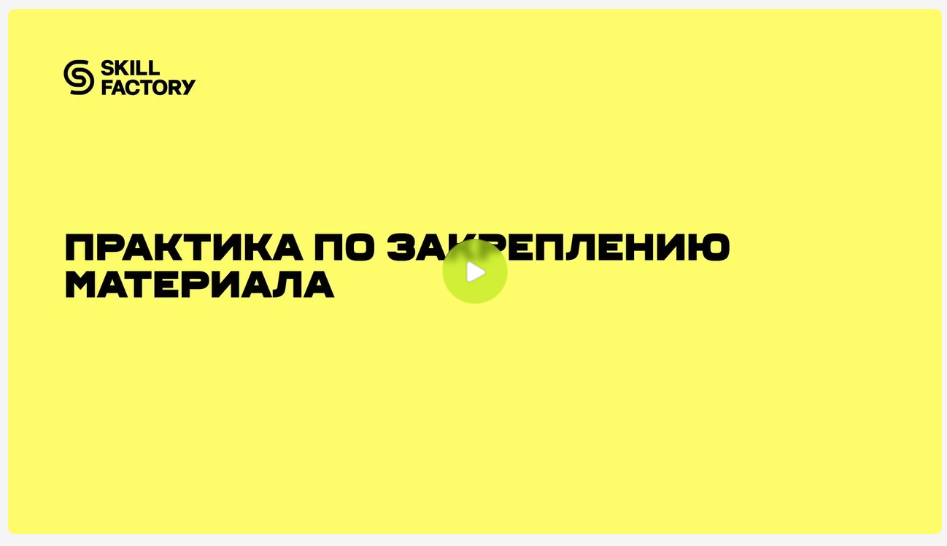

- Ноутбук из скринкаста;
- Данные из скринкаста.

Книжному интернет-магазину необходимо уметь предсказывать объём заказов, чтобы выделить необходимое количество сотрудников на сбор и упаковку и уменьшить задержки. Вам предстоит решить задачу предсказания товарооборота этого магазина.

Датасет состоит из двух столбцов:

- date — дата заказа;
- quantity (qty) — количество книг, заказанных в этот день.

Загрузите датасет и выполните следующие шаги. После вам необходимо будет ответить на вопросы по выполненному заданию.

1. Отложите в test последнее значение временного ряда.
2. Проанализируйте временной ряд на наличие тренда и сезонности.
3. Постройте прогноз на одно последнее значение с помощью экспоненциального сглаживания (=0.7). Сравните результат с фактическим значением, которое вы отложили вначале.
4. Проверьте ряд на стационарность, определите порядок интегрирования.
5. Определите порядок модели AR по графику частичной автокорреляции.
6. Постройте модель AR и предскажите последнее значение ряда. Обратите внимание: модель строится на исходном временном ряду.
7. Сравните полученные результаты.

-> открыть **MATH_ML-12_r_Exp_AR_TS-check.ipynb**

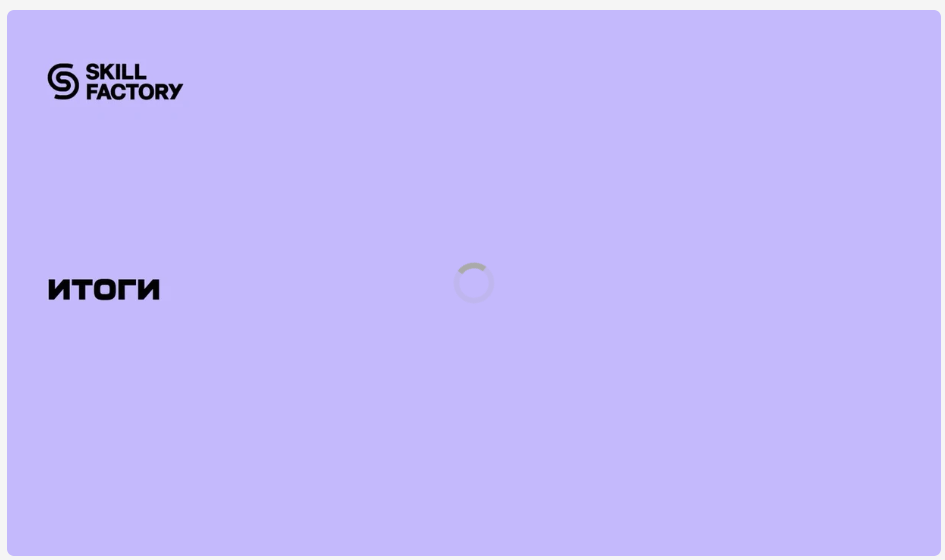

 Поздравляем, вы завершили модуль по введению в работу с временными рядами!

В этом модуле мы познакомились с базовыми понятиями и статистическими методами анализа временных рядов. Как уже отмечалось ранее, временной ряд — это особый вид данных, поэтому перед работой очень важно познакомиться с рядом, анализ которого вам предстоит сделать, и проанализировать его свойства. Таким образом, знание и умение пользоваться изученными инструментами является неотъемлемой частью базового набора дата-сайентиста.

Однако для эффективного анализа данных этих методов далеко не всегда бывает достаточно — обычно они используются для первичного анализа и позволяют сделать предварительные выводы. После этого в ход идут более сложные модели машинного обучения, с которыми мы будем знакомиться в следующем модуле.

Полезные ссылки модуля:

- Installing statsmodels https://www.statsmodels.org/devel/install.html
- “A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python” («Нежное введение в экспоненциальное сглаживание для прогнозирования временных рядов в Python») https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
- Лекция 9. Экспоненциальное сглаживание. Распознавание образов: метод -го ближайшего соседа https://www.youtube.com/watch?v=M0Hz1u59Ysw
- “A Gentle Introduction to Autocorrelation and Partial Autocorrelation” («Частичная автокорреляция (PACF)») https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- “How to Perform a Durbin-Watson Test in Python” https://www.statology.org/durbin-watson-test-python/
- “Autocorrelation” https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm